                        LogisticRegression代码实现


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [25]:
df_X = pd.read_csv('logistic_x.txt',sep='\ +',header = None,engine ='python')#读取X数据
ys = pd.read_csv('logistic_y.txt',sep='\ +',header = None,engine ='python')#读取y数据
ys = ys.astype(int)
df_X['label'] = ys[0].values

In [26]:
df_X.columns = ['x1','x2','label']

In [27]:
df_X.head()

,x1,x2,label
0,1.343250,-1.331148,0
1,1.820553,-0.634668,0
2,0.986321,-1.888576,0
3,1.944373,-1.635452,0
4,0.976734,-1.353315,0


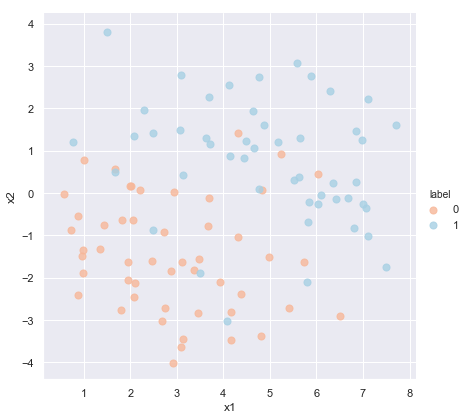

In [28]:
#在二维图中描绘X点所处位置，直观查看数据点的分布情况
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2),color_codes=False)


sns.lmplot('x1', 'x2', hue='label', data=df_X, 
           height=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.show()#看下数据的样子

In [29]:
def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    return data.iloc[:, :-1].values # 这个操作返回 ndarray,不是矩阵


def get_y(df):#读取标签
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列
Xs = get_X(df_X)
ys = get_y(df_X)

In [30]:
print(type(Xs))

<class 'numpy.ndarray'>


In [31]:
from __future__ import print_function
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False) #因为前面已经将截距项的值合并到变量中，此处参数设置不需要截距项
lr.fit(Xs, ys) #拟合
score = lr.score(Xs, ys) #结果评价
print("Coefficient: %s" % lr.coef_)
print("Score: %s" % score)

Coefficient: [[-1.70090714  0.55446484  1.07222372]]
Score: 0.898989898989899


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


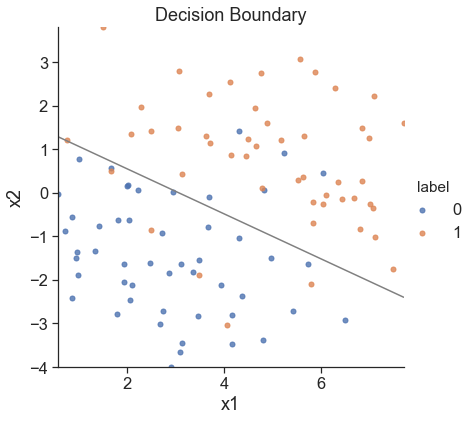

In [34]:
_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

#将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
_ys = (lr.coef_[0][0] + lr.coef_[0][1] * _xs) / (- lr.coef_[0][2])

sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('x1', 'x2', hue='label', data=df_X, 
           height=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )
plt.plot(_xs, _ys, 'grey')
plt.xlim(np.min(Xs[:,1]),  np.max(Xs[:,1]))
plt.ylim(np.min(Xs[:,2]),  np.max(Xs[:,2]))
plt.title('Decision Boundary')
plt.show()

              用梯度下降法将相同的数据分类，画图和sklearn的结果相比较

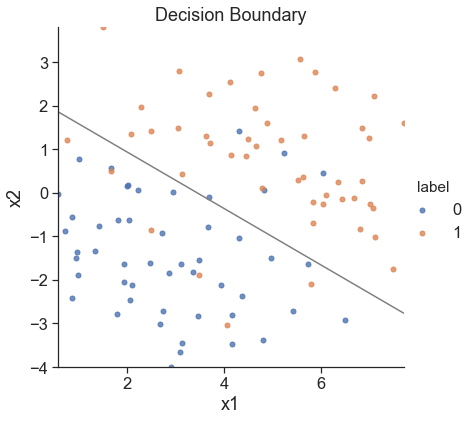

In [35]:
class LGR_GD():
    def __init__(self):
        self.w = None 
        self.n_iters = None
    def fit(self,X,y,alpha=0.03,loss = 1e-10): # 设定步长为0.002，判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        self.n_iters = 0
        #============================= show me your code =======================
        while tol > loss: #设置收敛条件
            zs = X.dot(self.w.T) 
            h_f = 1 / (1 + np.exp(-zs)) 
            theta = self.w + alpha *np.mean(X*(y - h_f),axis=0) #计算迭代的参数值
            tol = np.sum(np.abs(theta - self.w))
            self.w = theta #更新参数值
            self.n_iters += 1 #更新迭代次数
         #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lr_gd = LGR_GD()
    lr_gd.fit(Xs,ys)

    _xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

    #将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
    _ys = (lr_gd.w[0][0] + lr_gd.w[0][1] * _xs) / (- lr_gd.w[0][2])

    sns.set(context="notebook", style="ticks", font_scale=1.5)

    sns.lmplot('x1', 'x2', hue='label', data=df_X, 
               height=6, 
               fit_reg=False, 
               scatter_kws={"s": 25}
              )
    plt.plot(_xs, _ys, 'grey')
    plt.xlim(np.min(Xs[:,1]),  np.max(Xs[:,1]))
    plt.ylim(np.min(Xs[:,2]),  np.max(Xs[:,2]))
    plt.title('Decision Boundary')
    plt.show()

            用牛顿法实现结果，画图和sklearn的结果相比较，并比较牛顿法和梯度下降法迭代收敛的次数

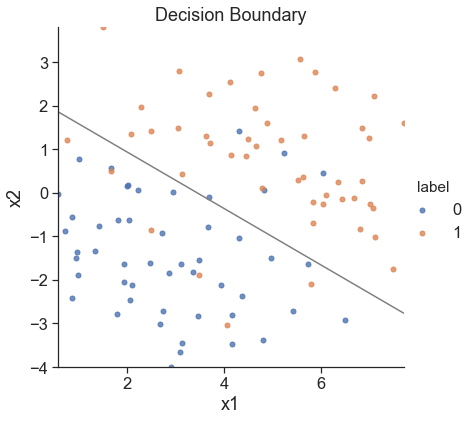

In [36]:
class LGR_NT():
    def __init__(self):
        self.w = None
        self.n_iters = None
    def fit(self,X,y,loss = 1e-10): # 判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        n_iters =0
        Hessian = np.zeros((d,d))
        #============================= show me your code =======================
        while tol > loss:
            zs = X.dot(self.w.T)
            h_f = 1 / (1 + np.exp(-zs))
            grad = np.mean(X*(y - h_f),axis=0)
            for i in range(d):
                for j in range(d):
                    if j>=i:
                        Hessian[i][j] = np.mean(h_f*(h_f-1)*X[:,i]*X[:,j]) #更新海森矩阵中的值
                    else:
                        Hessian[i][j] = Hessian[j][i] #按海森矩阵的性质，对称点可直接得出结果
            theta = self.w - np.linalg.inv(Hessian).dot(grad)
            tol = np.sum(np.abs(theta - self.w))
            self.w = theta
            n_iters += 1
        #============================= show me your code =======================
        self.w = theta
        self.n_iters = n_iters
        
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lgr_nt = LGR_NT()
    lgr_nt.fit(Xs,ys)
    _xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

    #将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
    _ys = (lgr_nt.w[0][0] + lgr_nt.w[0][1] * _xs) / (- lgr_nt.w[0][2])

    sns.set(context="notebook", style="ticks", font_scale=1.5)

    sns.lmplot('x1', 'x2', hue='label', data=df_X, 
               height=6, 
               fit_reg=False, 
               scatter_kws={"s": 25}
              )
    plt.plot(_xs, _ys, 'grey')
    plt.xlim(np.min(Xs[:,1]),  np.max(Xs[:,1]))
    plt.ylim(np.min(Xs[:,2]),  np.max(Xs[:,2]))
    plt.title('Decision Boundary')
    plt.show()

In [38]:
print("梯队下降法结果参数：%s; 梯度下降法迭代次数: %s" %(lr_gd.w,lr_gd.n_iters))
print("牛顿法结果参数：%s; 牛顿法迭代次数: %s" %(lgr_nt.w,lgr_nt.n_iters))

梯队下降法结果参数：[[-2.62051144  0.7603715   1.17194673]]; 梯度下降法迭代次数: 32590
牛顿法结果参数：[[-2.6205116   0.76037154  1.17194674]]; 牛顿法迭代次数: 47


可以，看到，牛顿法的收敛速度比梯度下降法快很多